In [ ]:
import pickle
import zipfile

#object = pd.read_pickle(r'/Users/brooksantangelo/Documents/Rotation2/Rocky/PKL_Additions/GutMGene/Node2Vec_DimensionCheck/PheKnowLator_v2_node2vec_Model.pkl/model.pckl')

#objects = []
#with open('/Users/brooksantangelo/Documents/Rotation2/Rocky/PKL_Additions/GutMGene/Node2Vec_DimensionCheck/PheKnowLator_v2_node2vec_Model.pkl/model.pckl','rb') as f:
#    objects.append(pickle.load(f))
  
zf = zipfile.ZipFile('/Users/brooksantangelo/Documents/Rotation2/Rocky/PKL_Additions/GutMGene/Node2Vec_DimensionCheck/PheKnowLator_v2_node2vec_Model.pkl.zip', 'w', zipfile.ZIP_DEFLATED)

f = zf.open('/Users/brooksantangelo/Documents/Rotation2/Rocky/PKL_Additions/GutMGene/Node2Vec_DimensionCheck/PheKnowLator_v2_node2vec_Model.pkl')
f.read(1)
f.readline()

In [ ]:
#Test logistic regression with existing graph of MONDO, GO, and OTU classes because I already
#had those embeddings stored


#samples = # nodes in graph
#classes = # types of nodes in graph (i.e. # unique CURIEs)


#Import medici network as test
import networkx as nx
import csv
from csv import reader

#Import disease, GO, otus from network
mondo_file = '/Users/brooksantangelo/Documents/Rotation2/Rocky/PKL_Additions/GutMGene/AnalysisOutput/MONDO_embeddings_df.csv'
go_file = '/Users/brooksantangelo/Documents/Rotation2/Rocky/PKL_Additions/GutMGene/AnalysisOutput/GO_embeddings_df.csv'
otu_file = '/Users/brooksantangelo/Documents/Rotation2/Rocky/PKL_Additions/GutMGene/AnalysisOutput/otu_embeddings.csv'

features = []
classes = []

#MONDO- class 0
f = open(mondo_file,'r')
reader = csv.reader(f)
#Skip header which is just dimension names
next(reader,None)

for row in reader:
    features.append([float(i) for i in row[1:]])
    classes.append(0)
    #features.append(row[1:])
f.close
#GO- class 1
f = open(mondo_file,'r')
reader = csv.reader(f)
#Skip header which is just dimension names
next(reader,None)

for row in reader:
    features.append([float(i) for i in row[1:]])
    classes.append(1)
    #features.append(row[1:])
f.close
#OTU- class 2
f = open(mondo_file,'r')
reader = csv.reader(f)
#Skip header which is just dimension names
next(reader,None)

for row in reader:
    classes.append(2)
    features.append([float(i) for i in row[1:]])
    #features.append(row[1:])
f.close

In [ ]:
# logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define model
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(features, classes)
# make predictions
yhat = model.predict(features)




In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(classes,yhat,average = 'macro')
print(f1)

In [2]:
##Only have to run these once for all embeddings files
edgelist_cleaned_file = '/Users/brooksantangelo/Documents/Rotation2/Rocky/PKL_Additions/GutMGene/PheKnowLator_v2.1.0_full_instance_relationsOnly_OWLNETS_Triples_Integers_node2vecInput_cleaned_withGutMGene_withMicrobes.txt'


#G = nx.read_edgelist(edgelist_cleaned_file)
#nodes = list(G)


#print(len(nodes))

#from igraph import *

#g = Graph.Read_Edgelist(edgelist_cleaned_file, directed=True)
#nodes = g.vs

In [103]:
import pandas as pd
edgelist_cleaned_file = '/Users/brooksantangelo/Documents/Rotation2/Rocky/PKL_Additions/GutMGene/PheKnowLator_v2.1.0_full_instance_relationsOnly_OWLNETS_Triples_Integers_node2vecInput_cleaned_withGutMGene_withMicrobes.txt'

#edgelist_test = pd.read_csv(edgelist_cleaned_file,delimiter=' ',header=None,index_col=False) 
#print(len(edgelist_test))

#edgelist_test.columns = ['Subject','Object']

#unique_nodes = pd.Series({col:edgelist_test[col].unique() for col in edgelist_test})
column_values = edgelist_test[['Subject','Object']].values.ravel()
unique_nodes = pd.unique(column_values)

print(len(unique_nodes))

745700


In [19]:
##Only have to run these once for all embeddings files
import csv
from csv import reader

nodes = []

with open(edgelist_cleaned_file, newline = '') as f:                                                                                          
    f_reader = csv.reader(f, delimiter=' ')
    for l in f_reader:
        if int(l[0]) not in nodes:
            nodes.append(int(l[0]))
        if int(l[1]) not in nodes:
            nodes.append(int(l[1]))       
        

In [105]:
import pandas as pd

column_values = edgelist_test[['Subject','Object']].values.ravel()
unique_nodes = pd.unique(column_values)


iden_subset = {key: value for key, value in iden.items() if value in unique_nodes}
print(len(list(iden_subset.keys())))

745700
745998
745700


Testing this method for the embeddings2.emb file

In [116]:

unknown_uris = []
classes_b = []


for key,val in tqdm(iden_subset.items()):
    covered = 0
    lab = [idx for idx,i in enumerate(label_names) if label_names[idx].lower() in key.lower()]
    if len(lab) == 0:
        classes_b.append(len(label_names)+1)
        unknown_uris.append(key)
        print('Unknown: ',key,lab)
    if len(lab) == 1:
        classes_b.append(lab[0])
    


 88%|████████▊ | 654067/745700 [00:10<00:01, 64721.29it/s]

Unknown:  <http://purl.obolibrary.org/obo/D96882F1-8709-49AB-BCA9-772A67EA6C33> []
Unknown:  subject []
Unknown:  object []


100%|██████████| 745700/745700 [00:12<00:00, 60505.97it/s]


In [118]:
print(classes_b[0:30])
print(classes_new[0:30])

[2, 0, 12, 5, 12, 7, 7, 1, 6, 5, 2, 0, 6, 6, 13, 8, 12, 5, 4, 2, 4, 4, 13, 11, 11, 0, 13, 11, 12, 5]
[2, 0, 12, 5, 12, 7, 7, 1, 6, 17, 5, 2, 0, 6, 17, 6, 17, 13, 8, 12, 5, 4, 2, 4, 4, 13, 11, 11, 0, 13]


In [64]:
unclassified_uris = ['<http://purl.obolibrary.org/obo/MF_0000020>','<http://purl.obolibrary.org/obo/PCO_0000018>',
          '<http://purl.obolibrary.org/obo/PCO_0000000>','<http://purl.obolibrary.org/obo/PCO_0000001>',
          '<http://purl.obolibrary.org/obo/OGMS_0000063>','<http://purl.obolibrary.org/obo/OGMS_0000031>',
          '<http://purl.obolibrary.org/obo/MF_0000061>','<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#Amniotic_Fluid>',
          '<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#Gonad>','<http://purl.obolibrary.org/obo/OBA_1001084>',
          '<http://sig.uw.edu/fma#Common_iliac_artery>','<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#Iliac_Vein>',
          '<http://sig.uw.edu/fma#External_genitalia>','<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#Amniotic_Sac>',
          '<http://sig.uw.edu/fma#Amnion>','<http://purl.obolibrary.org/obo/NCIT_C15493>','<http://purl.obolibrary.org/obo/CP_0000037>',
          '<http://sig.uw.edu/fma#Umbilicus>','<http://sig.uw.edu/fma#Trachealis>','<http://sig.uw.edu/fma#Scalp>',
          '<http://purl.obolibrary.org/obo/CP_0000039>','<http://sig.uw.edu/fma#Iliac_crest>','<http://purl.obolibrary.org/obo/MF_0000033>',
          '<http://purl.obolibrary.org/obo/MF_0000032>','<http://purl.obolibrary.org/obo/NCIT_C14239>',
          '<http://purl.obolibrary.org/obo/NCIT_C38328>','<http://purl.obolibrary.org/obo/NCIT_C35920>','<http://purl.obolibrary.org/obo/OAE_0000097>',
          '<http://purl.obolibrary.org/obo/OAE_0000004>','<http://sig.uw.edu/fma#Ischium>','<http://purl.obolibrary.org/obo/NCIT_C38103>',
          '<http://purl.obolibrary.org/obo/NCIT_C18020>','<http://purl.obolibrary.org/obo/PCO_0000031>','<http://purl.obolibrary.org/obo/MFOMD_0000107>',
          '<http://purl.obolibrary.org/obo/NCIT_C68749>','<http://sig.uw.edu/fma#Calcaneal_tendon>','<http://purl.bioontology.org/ontology/SNOMEDCT/277441005>',
          '<http://purl.obolibrary.org/obo/CP_0000028>','<http://purl.obolibrary.org/obo/NCIT_C45980>','<http://purl.obolibrary.org/obo/MFOMD_0000101>',
          '<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#Chorionic_Villus>','<http://purl.obolibrary.org/obo/OAE_0000001>',
          '<http://purl.obolibrary.org/obo/OGMS_0000061>','<http://purl.obolibrary.org/obo/CP_0000027>','<http://purl.obolibrary.org/obo/MF_0000013>',
           '<http://purl.obolibrary.org/obo/NCIT_C19683>','<http://purl.obolibrary.org/obo/UMLS_C1709838>','<http://purl.obolibrary.org/obo/NCIT_C36104>',
          '<http://purl.obolibrary.org/obo/NCIT_C16326>','<http://purl.obolibrary.org/obo/MFOEM_000193>','<http://purl.obolibrary.org/obo/NCIT_C53637>',
          '<http://purl.obolibrary.org/obo/NCIT_C17204>','<http://purl.obolibrary.org/obo/NCIT_C37109>','<http://purl.obolibrary.org/obo/NCIT_C15496>',
          '<http://purl.obolibrary.org/obo/PCO_0000002>','<http://purl.obolibrary.org/obo/PCO_0000029>','<http://purl.obolibrary.org/obo/MFOMD_0000109>',
          '<http://purl.obolibrary.org/obo/NCIT_C15497>','<http://purl.obolibrary.org/obo/NCIT_C17214>','<http://purl.obolibrary.org/obo/NCIT_C147564>',
          '<http://purl.obolibrary.org/obo/NCIT_C16273>','<http://purl.obolibrary.org/obo/MF_0000073>','<http://purl.obolibrary.org/obo/MF_0000075>',
          '<http://purl.obolibrary.org/obo/IDO_0000528>','<http://purl.obolibrary.org/obo/IDO_0000528>','<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#Embryonic_Fluid>',
          '<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#Embryonic_Fluid>','<http://purl.obolibrary.org/obo/MFOMD_0000105>',
           '<http://purl.obolibrary.org/obo/MF_0000008>','<http://purl.obolibrary.org/obo/CP_0000035>','<http://purl.obolibrary.org/obo/MF_0000031>',
          '<http://purl.obolibrary.org/obo/MF_0000030>','<http://purl.obolibrary.org/obo/NCIT_C68748>','<http://purl.obolibrary.org/obo/MFOMD_0000122>',
          '<http://sig.uw.edu/fma#Tunica_albuginea_of_testis>','<http://purl.obolibrary.org/obo/OAE_0000055>','<http://purl.obolibrary.org/obo/NCIT_C52005>',
          '<http://purl.obolibrary.org/obo/NCIT_C19160>','<http://purl.obolibrary.org/obo/NCIT_C20181>','<http://purl.obolibrary.org/obo/OGMS_0000060>',
          '<http://purl.obolibrary.org/obo/MFOMD_0000119>','<http://purl.obolibrary.org/obo/NCIT_C25193>','<http://purl.obolibrary.org/obo/OGMS_0000087>',
          '<http://purl.obolibrary.org/obo/NCIT_C19085>','<http://purl.obolibrary.org/obo/NCIT_C38053>','<http://purl.obolibrary.org/obo/CP_0000040>',
          '<http://purl.obolibrary.org/obo/NCIT_C16809>','<http://purl.obolibrary.org/obo/NCIT_C45981>','<http://purl.obolibrary.org/obo/D96882F1-8709-49AB-BCA9-772A67EA6C33>',
          '<http://purl.obolibrary.org/obo/CP_0000000>','subject','object','<http://purl.obolibrary.org/obo/MF_0000017>','<http://sig.uw.edu/fma#Right_ischium>',
          '<http://purl.obolibrary.org/obo/MF_0000074>','<http://purl.obolibrary.org/obo/MF_0000076>','<http://purl.obolibrary.org/obo/NCIT_C37123>',
          '<http://purl.obolibrary.org/obo/NCIT_C36869>','<http://purl.obolibrary.org/obo/NCIT_C15492>','<http://purl.obolibrary.org/obo/NCIT_C43431>',
          '<http://purl.obolibrary.org/obo/NCIT_C43431>','<http://purl.obolibrary.org/obo/CP_0000043>','<http://purl.obolibrary.org/obo/OGMS_0000045>',
          '<http://purl.obolibrary.org/obo/IDO_0000547>','<http://purl.obolibrary.org/obo/FBbt_01000119>','<http://purl.obolibrary.org/obo/NCIT_C16525>',
          '<http://purl.obolibrary.org/obo/UPHENO_0001001>']
indexes = []


for i in unclassified_uris:
    indexes.append(iden[i])
    
print(indexes)

#Need to add these categories:
added_label_names = ['MF_', 'PCO_', 'OGMS_', 'EVS/', 'NCIT_', 'CP_', 'MFOEM_', 'UMLS_', 'OAE_', 'OGMS_', '/fma', 'MFOMD_', 'IDO_','FBbt_','UPHENO_']

start = 36
for n in range(len(unclassified_uris)):
    for i in range(len(added_label_names)):
        if added_label_names[i].lower() in unclassified_uris[n].lower():
            classes.insert(indexes[n],36+i)


[73277, 87587, 87588, 96274, 105847, 105849, 111338, 113833, 130492, 152661, 175483, 175568, 183873, 210578, 210579, 210761, 214746, 214767, 219462, 221052, 228409, 228727, 242367, 242368, 255969, 261691, 263388, 271537, 271538, 276513, 277036, 277037, 282335, 300994, 304553, 323458, 324278, 324452, 329497, 337916, 355489, 380681, 380682, 382300, 394944, 395722, 395879, 403932, 407761, 419722, 437514, 442966, 455233, 457579, 458028, 458029, 462633, 471058, 479087, 483964, 484907, 497719, 497720, 506305, 506305, 508106, 508106, 514527, 531040, 539299, 541666, 541667, 548612, 553922, 558676, 563987, 574312, 596018, 596019, 597246, 600796, 601910, 602488, 618054, 620247, 626809, 631887, 642856, 643462, 644325, 650326, 650328, 652156, 659857, 669845, 675371, 684814, 688874, 695517, 704335, 704335, 712509, 719442, 722995, 726920, 735461, 738136]


In [87]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import json
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from tqdm import tqdm

def get_classes(identifier_map,label_names):

    classes = []
    unknown_uris = []

    for key,val in tqdm(identifier_map.items()):
        covered = 0
        lab = [idx for idx,i in enumerate(label_names) if label_names[idx].lower() in key.lower()]
        if len(lab) == 0:
            classes.append(len(label_names)+1)
            unknown_uris.append(key)
        if len(lab) == 1:
            classes.append(lab[0])
        
    return classes,unknown_uris

def get_features(embeddings_file,identifier_map):
    
    emb = KeyedVectors.load_word2vec_format(embeddings_file, binary=False)

    #Read embeddings into list for classification
    features = []

    for n in list(identifier_map.values()):
        #Get embedding for each node, append to features
        features.append(emb[str(n)])
        
    return features

def get_f1_score(features,classes):
    # define model
    model = LogisticRegression(multi_class='ovr',max_iter=1000)
    # fit model
    model.fit(features, classes)
    # make predictions
    predictions = model.predict(features)
    
    #calc macro-f1 score
    f1 = f1_score(classes,predictions,average = 'macro')
    
    return f1

def plot_f1_scores(output_dir,f1_scores):

    #Sort dimensions from lowest to highest for plot
    dictionary_items = f1_scores.items()
    sorted_f1_scores = sorted(dictionary_items)

    x = [a_tuple[0] for a_tuple in sorted_f1_scores]
    y = [a_tuple[1] for a_tuple in sorted_f1_scores]
    plt.title("Parameter Sensitivity for PKL+GutMGene Vector Embeddings")
    plt.xlabel("# Dimensions")
    plt.ylabel("Macro-F1 Score")
    plt.scatter(x,y)
    plt.plot(x,y)
    
    plt.savefig(output_dir + 'F1_Scores.png')
    

In [9]:
import pandas as pd
edgelist_cleaned_file = '/Users/brooksantangelo/Documents/Rotation2/Rocky/PKL_Additions/GutMGene/Node2Vec_DimensionCheck/PheKnowLator_v2.1.0_full_instance_relationsOnly_OWLNETS_Triples_Integers_node2vecInput_cleaned_withGutMGene_withMicrobes.txt'

edgelist_nodes = pd.read_csv(edgelist_cleaned_file,delimiter=' ',header=None,index_col=False) 
#print(len(edgelist_test))

edgelist_nodes.columns = ['Subject','Object']

#unique_nodes = pd.Series({col:edgelist_test[col].unique() for col in edgelist_test})
column_values = edgelist_nodes[['Subject','Object']].values.ravel()
unique_nodes = pd.unique(column_values)

print(len(unique_nodes))

744757


Running this for all embeddings files

In [12]:
#Run this for each embedding file, this will produce first plot of 1 embeddings file per dimension
import os
import pandas as pd
import re
import matplotlib.pyplot as plt


identifier_json = '/Users/brooksantangelo/Documents/Rotation2/Rocky/PKL_Additions/GutMGene/PheKnowLator_v2.1.0_full_instance_relationsOnly_OWLNETS_Triples_Integer_Identifier_Map_withGutMGene_withMicrobes.json'


f = open(identifier_json)
#Dictionary of uri's as keys and integers as values
iden = json.load(f)

#Subset dictionary to only nodes in edgelist
#column_values = edgelist_test[['Subject','Object']].values.ravel()
#unique_nodes = pd.unique(column_values)

iden_subset = {key: value for key, value in iden.items() if value in unique_nodes}


label_names = ['HP_','GO_','MONDO_','VO_','CHEBI_','UBERON_','CLO_','PR_','SO_','PW_','NCBITaxon_',
               'gene','ensembl','snp','reactome','cellline','PheKnowLator','CL_','MOD_',
               'PATO_','snomedct','DOID_','CARO_','GNO_','EFO_','FAKEURI','NBO_','MPATH_',
              'BFO_','FOODON_','ECTO_','OGG_','HsapDv_','ExO_','PO_','FMA_','MF_','PCO_','EVS/',
               'NCIT_','CP_','MFOEM_','UMLS_','OAE_','OGMS_','MFOMD_','IDO_','FBbt_','UPHENO_','OBA','fma#']


embeddings_files_dir = '/Users/brooksantangelo/Documents/Rotation2/Rocky/PKL_Additions/GutMGene/Node2Vec_DimensionCheck/'

#Classes are the same for all embeddings files
classes,unknown_uris = get_classes(iden_subset,label_names)

#Store all f1 scores
f1_scores = {}

os.chdir(embeddings_files_dir)

#for i in range(0,3):
for filename in tqdm(os.listdir(embeddings_files_dir)):
    if filename.endswith(('.emb')):
        print(filename)

        features = get_features(filename,iden_subset)
        print('features done')

        f1 = get_f1_score(features,classes)
        print('f1 score done')
        dim = re.search("Embeddings(.*?).emb", filename).group(1)
        f1_scores[int(dim)] = f1

plot_f1_scores(embeddings_files_dir,f1_scores)



  0%|          | 0/42 [00:00<?, ?it/s]

PheKnowLator_v2_node2vec_Embeddings122.emb
features done


  2%|▏         | 1/42 [10:14<6:59:47, 614.33s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings26.emb
features done


  5%|▍         | 2/42 [13:14<3:59:07, 358.69s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings2.emb
features done


  7%|▋         | 3/42 [14:02<2:20:55, 216.81s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings18.emb
features done


 10%|▉         | 4/42 [16:27<1:59:25, 188.58s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings30.emb
features done


 12%|█▏        | 5/42 [19:35<1:56:05, 188.26s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings118.emb
features done


 17%|█▋        | 7/42 [28:06<2:09:46, 222.47s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings34.emb
features done


 19%|█▉        | 8/42 [31:30<2:03:19, 217.63s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings6.emb
features done


 24%|██▍       | 10/42 [32:40<1:13:56, 138.64s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings22.emb
features done


 31%|███       | 13/42 [35:17<46:57, 97.14s/it]   

f1 score done
PheKnowLator_v2_node2vec_Embeddings126.emb
features done


 33%|███▎      | 14/42 [45:13<1:28:42, 190.09s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings86.emb
features done


 36%|███▌      | 15/42 [52:00<1:46:05, 235.75s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings78.emb
features done


 38%|███▊      | 16/42 [58:15<1:56:07, 268.00s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings50.emb
features done


 40%|████      | 17/42 [1:02:47<1:51:58, 268.75s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings46.emb
features done


 43%|████▎     | 18/42 [2:10:05<8:21:57, 1254.90s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings90.emb
features done


 45%|████▌     | 19/42 [2:16:51<6:32:34, 1024.12s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings94.emb
features done


 50%|█████     | 21/42 [2:23:42<3:53:04, 665.95s/it] 

f1 score done
PheKnowLator_v2_node2vec_Embeddings42.emb
features done


 52%|█████▏    | 22/42 [2:27:43<3:08:18, 564.91s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings54.emb
features done


 57%|█████▋    | 24/42 [2:32:35<1:58:36, 395.34s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings82.emb
features done


 60%|█████▉    | 25/42 [2:39:20<1:52:37, 397.48s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings70.emb
features done


 62%|██████▏   | 26/42 [2:45:27<1:44:00, 390.02s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings58.emb
features done


 64%|██████▍   | 27/42 [2:50:41<1:32:39, 370.63s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings98.emb
features done


 69%|██████▉   | 29/42 [2:58:33<1:07:54, 313.43s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings66.emb
features done


 71%|███████▏  | 30/42 [3:05:10<1:06:35, 332.98s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings62.emb
features done


 74%|███████▍  | 31/42 [6:08:56<9:09:37, 2997.91s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings74.emb
features done


 76%|███████▌  | 32/42 [6:14:47<6:23:50, 2303.03s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings102.emb
features done


 83%|████████▎ | 35/42 [6:21:56<2:15:14, 1159.23s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings128.emb
features done


 86%|████████▌ | 36/42 [6:29:57<1:42:16, 1022.74s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings114.emb
features done


 88%|████████▊ | 37/42 [6:37:57<1:15:07, 901.59s/it] 

f1 score done
PheKnowLator_v2_node2vec_Embeddings10.emb
features done


 90%|█████████ | 38/42 [6:39:34<47:06, 706.74s/it]  

f1 score done
PheKnowLator_v2_node2vec_Embeddings38.emb
features done


 93%|█████████▎| 39/42 [6:43:26<29:14, 584.80s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings14.emb
features done


 95%|█████████▌| 40/42 [6:45:26<15:20, 460.10s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings110.emb
features done


 98%|█████████▊| 41/42 [6:53:50<07:52, 472.33s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings106.emb
features done


100%|██████████| 42/42 [7:01:59<00:00, 602.83s/it]

f1 score done


NameError: name 'plt' is not defined

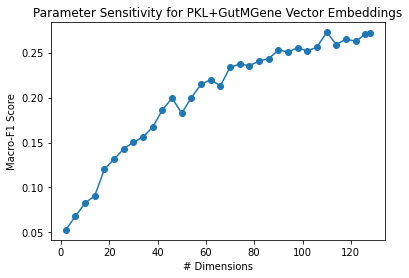

In [13]:
import matplotlib.pyplot as plt
plot_f1_scores(embeddings_files_dir,f1_scores)

In [162]:
#Look at variations of emb file since Node2Vec is random walk
from collections import defaultdict

#Store all f1 scores
#f1_scores_repeated = defaultdict(list)

f1_scores_repeated[38] = []
f1_scores_repeated[42] = []
f1_scores_repeated[46] = []
f1_scores_repeated[50] = []
os.chdir(embeddings_files_dir)
print(embeddings_files_dir)

for i in range(0,5):
    for filename in tqdm(os.listdir(embeddings_files_dir)):
        if '38' in filename or '42' in filename or '46' in filename or '50' in filename:
            #if '_3.emb' in filename or '_4.emb' in filename:
            print(filename)
            end_str = '_{}.emb'
            end_str = end_str.format(i)
            if filename.endswith(end_str):
                print(filename)

                features = get_features(filename,iden_subset)
                print('features done')

                f1 = get_f1_score(features,classes)
                print('f1 score done') 
                dim = re.search("Embeddings(.*?).emb", filename).group(1).split("_")[0]
                f1_scores_repeated[int(dim)].append(f1)
            
    print(f1_scores_repeated)

print('final: ',f1_scores_repeated)

/Users/brooksantangelo/Documents/Rotation2/Rocky/PKL_Additions/GutMGene/Node2Vec_DimensionCheck/0211Assertions


  0%|          | 0/73 [00:00<?, ?it/s]

PheKnowLator_v2_node2vec_Embeddings50_4.emb
PheKnowLator_v2_node2vec_Embeddings50_1.emb
PheKnowLator_v2_node2vec_Embeddings50_0.emb
PheKnowLator_v2_node2vec_Embeddings50_0.emb
features done


 23%|██▎       | 17/73 [04:44<15:35, 16.71s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings50_2.emb
PheKnowLator_v2_node2vec_Embeddings50_3.emb
F1_Scores_all&38_50_repeated.png
PheKnowLator_v2_node2vec_Embeddings46_3.emb
PheKnowLator_v2_node2vec_Embeddings46_2.emb
PheKnowLator_v2_node2vec_Embeddings38_4.emb
PheKnowLator_v2_node2vec_Embeddings42_4.emb
PheKnowLator_v2_node2vec_Embeddings46_0.emb
PheKnowLator_v2_node2vec_Embeddings46_0.emb
features done


 53%|█████▎    | 39/73 [08:49<07:25, 13.09s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings46_1.emb
PheKnowLator_v2_node2vec_Embeddings42_1.emb
PheKnowLator_v2_node2vec_Embeddings38_3.emb
PheKnowLator_v2_node2vec_Embeddings46_4.emb
PheKnowLator_v2_node2vec_Embeddings38_2.emb
PheKnowLator_v2_node2vec_Embeddings42_0.emb
PheKnowLator_v2_node2vec_Embeddings42_0.emb
features done


 71%|███████   | 52/73 [12:38<05:08, 14.71s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings42_2.emb
PheKnowLator_v2_node2vec_Embeddings38_0.emb
PheKnowLator_v2_node2vec_Embeddings38_0.emb
features done


100%|██████████| 73/73 [16:17<00:00, 13.39s/it]


f1 score done
PheKnowLator_v2_node2vec_Embeddings38_1.emb
PheKnowLator_v2_node2vec_Embeddings42_3.emb
defaultdict(<class 'list'>, {70: [0.22822693623396834, 0.2202929190154095, 0.21736088108724358, 0.23097475688483524, 0.233742948229737], 74: [0.2308240853453477, 0.23291376390062293, 0.2214643068550312, 0.22589441553369097, 0.23728870221518072], 66: [0.22623212050255742, 0.22848934939308513, 0.22153813643050635, 0.23063294811479051, 0.21304742826978584], 82: [0.23830311106096197, 0.25236690529401345, 0.2465617568913821, 0.24235428812118368, 0.24054336997781922], 78: [0.23567026557832552, 0.24047990384857337, 0.23221021756692425, 0.23553340120239935, 0.22936302755714238], 50: [0.18264195661576232], 46: [0.19938220925319455], 42: [0.18642089623202449], 38: [0.1671837007008676]})


  0%|          | 0/73 [00:00<?, ?it/s]

PheKnowLator_v2_node2vec_Embeddings50_4.emb
PheKnowLator_v2_node2vec_Embeddings50_1.emb
PheKnowLator_v2_node2vec_Embeddings50_1.emb
features done


 22%|██▏       | 16/73 [04:21<15:32, 16.36s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings50_0.emb
PheKnowLator_v2_node2vec_Embeddings50_2.emb
PheKnowLator_v2_node2vec_Embeddings50_3.emb
F1_Scores_all&38_50_repeated.png
PheKnowLator_v2_node2vec_Embeddings46_3.emb
PheKnowLator_v2_node2vec_Embeddings46_2.emb
PheKnowLator_v2_node2vec_Embeddings38_4.emb
PheKnowLator_v2_node2vec_Embeddings42_4.emb
PheKnowLator_v2_node2vec_Embeddings46_0.emb
PheKnowLator_v2_node2vec_Embeddings46_1.emb
PheKnowLator_v2_node2vec_Embeddings46_1.emb
features done


 56%|█████▌    | 41/73 [08:32<06:23, 12.00s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings42_1.emb
PheKnowLator_v2_node2vec_Embeddings42_1.emb
features done


 59%|█████▉    | 43/73 [13:54<11:25, 22.87s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings38_3.emb
PheKnowLator_v2_node2vec_Embeddings46_4.emb
PheKnowLator_v2_node2vec_Embeddings38_2.emb
PheKnowLator_v2_node2vec_Embeddings42_0.emb
PheKnowLator_v2_node2vec_Embeddings42_2.emb
PheKnowLator_v2_node2vec_Embeddings38_0.emb
PheKnowLator_v2_node2vec_Embeddings38_1.emb
PheKnowLator_v2_node2vec_Embeddings38_1.emb
features done


100%|██████████| 73/73 [18:30<00:00, 15.21s/it]


f1 score done
PheKnowLator_v2_node2vec_Embeddings42_3.emb
defaultdict(<class 'list'>, {70: [0.22822693623396834, 0.2202929190154095, 0.21736088108724358, 0.23097475688483524, 0.233742948229737], 74: [0.2308240853453477, 0.23291376390062293, 0.2214643068550312, 0.22589441553369097, 0.23728870221518072], 66: [0.22623212050255742, 0.22848934939308513, 0.22153813643050635, 0.23063294811479051, 0.21304742826978584], 82: [0.23830311106096197, 0.25236690529401345, 0.2465617568913821, 0.24235428812118368, 0.24054336997781922], 78: [0.23567026557832552, 0.24047990384857337, 0.23221021756692425, 0.23553340120239935, 0.22936302755714238], 50: [0.18264195661576232, 0.1940106195456298], 46: [0.19938220925319455, 0.19388912610167816], 42: [0.18642089623202449, 0.19115907335089233], 38: [0.1671837007008676, 0.1649501025362731]})


  0%|          | 0/73 [00:00<?, ?it/s]

PheKnowLator_v2_node2vec_Embeddings50_4.emb
PheKnowLator_v2_node2vec_Embeddings50_1.emb
PheKnowLator_v2_node2vec_Embeddings50_0.emb
PheKnowLator_v2_node2vec_Embeddings50_2.emb
PheKnowLator_v2_node2vec_Embeddings50_2.emb
features done


 30%|███       | 22/73 [07:15<16:50, 19.82s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings50_3.emb
F1_Scores_all&38_50_repeated.png
PheKnowLator_v2_node2vec_Embeddings46_3.emb
PheKnowLator_v2_node2vec_Embeddings46_2.emb
PheKnowLator_v2_node2vec_Embeddings46_2.emb
features done


 48%|████▊     | 35/73 [14:18<16:13, 25.62s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings38_4.emb
PheKnowLator_v2_node2vec_Embeddings42_4.emb
PheKnowLator_v2_node2vec_Embeddings46_0.emb
PheKnowLator_v2_node2vec_Embeddings46_1.emb
PheKnowLator_v2_node2vec_Embeddings42_1.emb
PheKnowLator_v2_node2vec_Embeddings38_3.emb
PheKnowLator_v2_node2vec_Embeddings46_4.emb
PheKnowLator_v2_node2vec_Embeddings38_2.emb
PheKnowLator_v2_node2vec_Embeddings38_2.emb
features done


 68%|██████▊   | 50/73 [19:39<09:07, 23.81s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings42_0.emb
PheKnowLator_v2_node2vec_Embeddings42_2.emb
PheKnowLator_v2_node2vec_Embeddings42_2.emb
features done


100%|██████████| 73/73 [25:45<00:00, 21.17s/it]


f1 score done
PheKnowLator_v2_node2vec_Embeddings38_0.emb
PheKnowLator_v2_node2vec_Embeddings38_1.emb
PheKnowLator_v2_node2vec_Embeddings42_3.emb
defaultdict(<class 'list'>, {70: [0.22822693623396834, 0.2202929190154095, 0.21736088108724358, 0.23097475688483524, 0.233742948229737], 74: [0.2308240853453477, 0.23291376390062293, 0.2214643068550312, 0.22589441553369097, 0.23728870221518072], 66: [0.22623212050255742, 0.22848934939308513, 0.22153813643050635, 0.23063294811479051, 0.21304742826978584], 82: [0.23830311106096197, 0.25236690529401345, 0.2465617568913821, 0.24235428812118368, 0.24054336997781922], 78: [0.23567026557832552, 0.24047990384857337, 0.23221021756692425, 0.23553340120239935, 0.22936302755714238], 50: [0.18264195661576232, 0.1940106195456298, 0.1869947560674183], 46: [0.19938220925319455, 0.19388912610167816, 0.18097124646223006], 42: [0.18642089623202449, 0.19115907335089233, 0.1899268787777346], 38: [0.1671837007008676, 0.1649501025362731, 0.17044699101690242]})


  0%|          | 0/73 [00:00<?, ?it/s]

PheKnowLator_v2_node2vec_Embeddings50_4.emb
PheKnowLator_v2_node2vec_Embeddings50_1.emb
PheKnowLator_v2_node2vec_Embeddings50_0.emb
PheKnowLator_v2_node2vec_Embeddings50_2.emb
PheKnowLator_v2_node2vec_Embeddings50_3.emb
PheKnowLator_v2_node2vec_Embeddings50_3.emb
features done


 32%|███▏      | 23/73 [08:23<18:13, 21.88s/it]

f1 score done
F1_Scores_all&38_50_repeated.png
PheKnowLator_v2_node2vec_Embeddings46_3.emb
PheKnowLator_v2_node2vec_Embeddings46_3.emb
features done


 45%|████▌     | 33/73 [19:02<25:19, 37.99s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings46_2.emb
PheKnowLator_v2_node2vec_Embeddings38_4.emb
PheKnowLator_v2_node2vec_Embeddings42_4.emb
PheKnowLator_v2_node2vec_Embeddings46_0.emb
PheKnowLator_v2_node2vec_Embeddings46_1.emb
PheKnowLator_v2_node2vec_Embeddings42_1.emb
PheKnowLator_v2_node2vec_Embeddings38_3.emb
PheKnowLator_v2_node2vec_Embeddings38_3.emb
features done


 62%|██████▏   | 45/73 [29:22<20:15, 43.40s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings46_4.emb
PheKnowLator_v2_node2vec_Embeddings38_2.emb
PheKnowLator_v2_node2vec_Embeddings42_0.emb
PheKnowLator_v2_node2vec_Embeddings42_2.emb
PheKnowLator_v2_node2vec_Embeddings38_0.emb
PheKnowLator_v2_node2vec_Embeddings38_1.emb
PheKnowLator_v2_node2vec_Embeddings42_3.emb
PheKnowLator_v2_node2vec_Embeddings42_3.emb
features done


100%|██████████| 73/73 [40:56<00:00, 33.65s/it]


f1 score done
defaultdict(<class 'list'>, {70: [0.22822693623396834, 0.2202929190154095, 0.21736088108724358, 0.23097475688483524, 0.233742948229737], 74: [0.2308240853453477, 0.23291376390062293, 0.2214643068550312, 0.22589441553369097, 0.23728870221518072], 66: [0.22623212050255742, 0.22848934939308513, 0.22153813643050635, 0.23063294811479051, 0.21304742826978584], 82: [0.23830311106096197, 0.25236690529401345, 0.2465617568913821, 0.24235428812118368, 0.24054336997781922], 78: [0.23567026557832552, 0.24047990384857337, 0.23221021756692425, 0.23553340120239935, 0.22936302755714238], 50: [0.18264195661576232, 0.1940106195456298, 0.1869947560674183, 0.2027014190795485], 46: [0.19938220925319455, 0.19388912610167816, 0.18097124646223006, 0.18420362483034405], 42: [0.18642089623202449, 0.19115907335089233, 0.1899268787777346, 0.1801182965668161], 38: [0.1671837007008676, 0.1649501025362731, 0.17044699101690242, 0.15925435634434895]})


  0%|          | 0/73 [00:00<?, ?it/s]

PheKnowLator_v2_node2vec_Embeddings50_4.emb
PheKnowLator_v2_node2vec_Embeddings50_4.emb
features done


 10%|▉         | 7/73 [08:50<1:23:23, 75.80s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings50_1.emb
PheKnowLator_v2_node2vec_Embeddings50_0.emb
PheKnowLator_v2_node2vec_Embeddings50_2.emb
PheKnowLator_v2_node2vec_Embeddings50_3.emb
F1_Scores_all&38_50_repeated.png
PheKnowLator_v2_node2vec_Embeddings46_3.emb
PheKnowLator_v2_node2vec_Embeddings46_2.emb
PheKnowLator_v2_node2vec_Embeddings38_4.emb
PheKnowLator_v2_node2vec_Embeddings38_4.emb
features done


 49%|████▉     | 36/73 [13:25<11:45, 19.06s/it] 

f1 score done
PheKnowLator_v2_node2vec_Embeddings42_4.emb
PheKnowLator_v2_node2vec_Embeddings42_4.emb
features done


 51%|█████     | 37/73 [18:51<18:53, 31.49s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings46_0.emb
PheKnowLator_v2_node2vec_Embeddings46_1.emb
PheKnowLator_v2_node2vec_Embeddings42_1.emb
PheKnowLator_v2_node2vec_Embeddings38_3.emb
PheKnowLator_v2_node2vec_Embeddings46_4.emb
PheKnowLator_v2_node2vec_Embeddings46_4.emb
features done


100%|██████████| 73/73 [24:13<00:00, 19.92s/it]

f1 score done
PheKnowLator_v2_node2vec_Embeddings38_2.emb
PheKnowLator_v2_node2vec_Embeddings42_0.emb
PheKnowLator_v2_node2vec_Embeddings42_2.emb
PheKnowLator_v2_node2vec_Embeddings38_0.emb
PheKnowLator_v2_node2vec_Embeddings38_1.emb
PheKnowLator_v2_node2vec_Embeddings42_3.emb
defaultdict(<class 'list'>, {70: [0.22822693623396834, 0.2202929190154095, 0.21736088108724358, 0.23097475688483524, 0.233742948229737], 74: [0.2308240853453477, 0.23291376390062293, 0.2214643068550312, 0.22589441553369097, 0.23728870221518072], 66: [0.22623212050255742, 0.22848934939308513, 0.22153813643050635, 0.23063294811479051, 0.21304742826978584], 82: [0.23830311106096197, 0.25236690529401345, 0.2465617568913821, 0.24235428812118368, 0.24054336997781922], 78: [0.23567026557832552, 0.24047990384857337, 0.23221021756692425, 0.23553340120239935, 0.22936302755714238], 50: [0.18264195661576232, 0.1940106195456298, 0.1869947560674183, 0.2027014190795485, 0.1865507344879969], 46: [0.19938220925319455, 0.193889126

In [163]:
#Replace repeated dimensions value with average of all iterations
from statistics import mean

f1_scores_averaged = copy.deepcopy(f1_scores)

for i in list(f1_scores_repeated.keys()):
    f1_scores_averaged[i] = mean(f1_scores_repeated[i])
    
print(f1_scores_averaged)

{122: 0.2625030253004353, 26: 0.14303966465350906, 2: 0.05274351308798768, 18: 0.12035274427796422, 30: 0.15024947851754572, 118: 0.2651474108410458, 34: 0.1561899172274464, 6: 0.06807209199411111, 22: 0.1313964645127137, 126: 0.27065589462765033, 86: 0.24333227922850947, 78: 0.23465136315067298, 50: 0.19057989715927115, 46: 0.1899285996136632, 90: 0.2528511117202387, 94: 0.2508706860111124, 42: 0.18839746554260167, 54: 0.1999672810715788, 82: 0.2440258862690721, 70: 0.22611968829023874, 58: 0.2147382547543983, 98: 0.25538080630545795, 66: 0.22398799654214505, 62: 0.21996253466734397, 74: 0.22967705476997471, 102: 0.25191436255164656, 128: 0.271643762128201, 114: 0.25904420023531316, 10: 0.08264407497855905, 38: 0.16523528331611337, 14: 0.09084604932990571, 110: 0.2726869572805966, 106: 0.2561212506129392}


In [143]:
print(sorted(list(f1_scores_repeated.keys())))

[38, 42, 46, 50, 66, 70, 74, 78, 82]


In [161]:
print(f1_scores_repeated)

defaultdict(<class 'list'>, {70: [0.22822693623396834, 0.2202929190154095, 0.21736088108724358, 0.23097475688483524, 0.233742948229737], 74: [0.2308240853453477, 0.23291376390062293, 0.2214643068550312, 0.22589441553369097, 0.23728870221518072], 66: [0.22623212050255742, 0.22848934939308513, 0.22153813643050635, 0.23063294811479051, 0.21304742826978584], 82: [0.23830311106096197, 0.25236690529401345, 0.2465617568913821, 0.24235428812118368, 0.24054336997781922], 78: [0.23567026557832552, 0.24047990384857337, 0.23221021756692425, 0.23553340120239935, 0.22936302755714238], 50: [0.18264195661576232, 0.1940106195456298, 0.1869947560674183, 0.1865507344879969, 0.2027014190795485, 0.1865507344879969, 0.2027014190795485, 0.1865507344879969, 0.2027014190795485], 46: [0.19938220925319455, 0.19388912610167816, 0.18097124646223006, 0.18420362483034405, 0.19119679142086923, 0.18420362483034405, 0.19119679142086923, 0.18420362483034405, 0.19119679142086923], 42: [0.18642089623202449, 0.191159073350

[2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74, 78, 82, 86, 90, 94, 98, 102, 106, 110, 114, 118, 122, 126, 128]


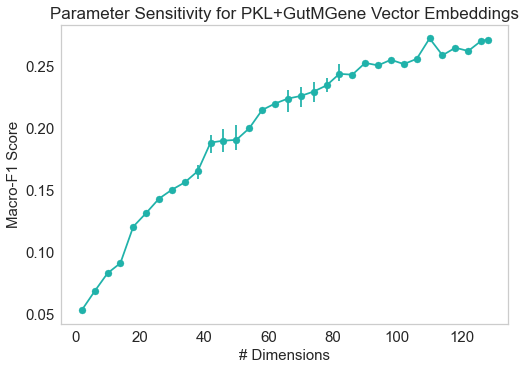

In [234]:
#Plot multiple lines per graph from defaultdict

embeddings_files_dir = '/Users/brooksantangelo/Documents/Rotation2/Rocky/PKL_Additions/GutMGene/Node2Vec_DimensionCheck/0211Assertions'

#Get f1 scores for other dimensions in graph
#dictionary_items = f1_scores.items()
dictionary_items = f1_scores_averaged.items()
sorted_f1_scores = sorted(dictionary_items)
dimensions = list(map(lambda x: x[0], sorted_f1_scores))
print(dimensions)

ymin_err = {}
ymax_err = {}
for i in range(len(dimensions)):
    ymin_err[dimensions[i]] = 0
    ymax_err[dimensions[i]] = 0

 #Sort dimensions from lowest to highest for plot
dictionary_items = f1_scores_repeated.items()
sorted_f1_scores_repeated = sorted(dictionary_items)

repeated_dimensions_add_to_start = [9,9,9,9,12,12,12,12,12]
sorted_f1_scores_averaged = sorted(f1_scores_averaged)

#All minimum values for repeated dimensions in order
ymin_tuple = [(dim, min(lst)) for dim, lst in sorted_f1_scores_repeated]
ymin = [tup[1] for tup in ymin_tuple]
for i in range(len(ymin)):
    #ymin_err[sorted_f1_scores_repeated[i][0]] = ((ymin[i] - sorted_f1_scores_repeated[i][1][0])*-1)
    ymin_err[sorted_f1_scores_repeated[i][0]] = ((ymin[i] - f1_scores_averaged[sorted_f1_scores_averaged[repeated_dimensions_add_to_start[i]+i]])*-1)
#All maximum values for repeated dimensions in order
ymax_tuple = [(dim, max(lst)) for dim, lst in sorted_f1_scores_repeated]
ymax = [tup[1] for tup in ymax_tuple]
for i in range(len(ymax)):
    #ymax_err[sorted_f1_scores_repeated[i][0]] = (ymax[i] - sorted_f1_scores_repeated[i][1][0])
    ymax_err[sorted_f1_scores_repeated[i][0]] = (ymax[i] - f1_scores_averaged[sorted_f1_scores_averaged[repeated_dimensions_add_to_start[i]+i]])
yerr = [list(ymin_err.values()),list(ymax_err.values())]


x = [a_tuple[0] for a_tuple in sorted_f1_scores]
y = [a_tuple[1] for a_tuple in sorted_f1_scores]

plt.rc('axes',titlesize= 17,labelsize=15)
plt.errorbar(x,y,yerr=yerr,color='lightseagreen')
plt.scatter(x,y,color='lightseagreen')
plt.title("Parameter Sensitivity for PKL+GutMGene Vector Embeddings")
plt.xlabel("# Dimensions")
plt.ylabel("Macro-F1 Score")
#plt.rc('xtick', labelsize=15) 
#plt.rc('ytick', labelsize=15) 
plt.grid(False)
plt.savefig(embeddings_files_dir + 'F1_Scores_all_repeatednew.png')




In [174]:
print(f1_scores_averaged)
print(sorted_f1_scores_averaged)

{122: 0.2625030253004353, 26: 0.14303966465350906, 2: 0.05274351308798768, 18: 0.12035274427796422, 30: 0.15024947851754572, 118: 0.2651474108410458, 34: 0.1561899172274464, 6: 0.06807209199411111, 22: 0.1313964645127137, 126: 0.27065589462765033, 86: 0.24333227922850947, 78: 0.23465136315067298, 50: 0.19057989715927115, 46: 0.1899285996136632, 90: 0.2528511117202387, 94: 0.2508706860111124, 42: 0.18839746554260167, 54: 0.1999672810715788, 82: 0.2440258862690721, 70: 0.22611968829023874, 58: 0.2147382547543983, 98: 0.25538080630545795, 66: 0.22398799654214505, 62: 0.21996253466734397, 74: 0.22967705476997471, 102: 0.25191436255164656, 128: 0.271643762128201, 114: 0.25904420023531316, 10: 0.08264407497855905, 38: 0.16523528331611337, 14: 0.09084604932990571, 110: 0.2726869572805966, 106: 0.2561212506129392}
[2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74, 78, 82, 86, 90, 94, 98, 102, 106, 110, 114, 118, 122, 126, 128]


In [165]:
print(ymin)

[0.15925435634434895, 0.1801182965668161, 0.18097124646223006, 0.18264195661576232, 0.21304742826978584, 0.21736088108724358, 0.2214643068550312, 0.22936302755714238, 0.23830311106096197]


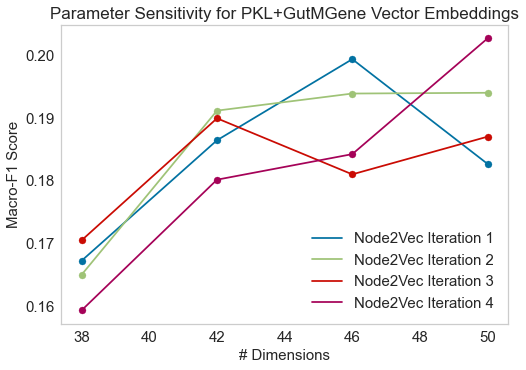

In [236]:
#Sort dimensions from lowest to highest for plot

chosen_dimensions = [38,42,46,50]

for i in range(len(sorted_f1_scores_repeated[0][1])):
    #print(sorted_f1_scores_repeated[i][0])
    if sorted_f1_scores_repeated[i][0] in chosen_dimensions:
    #print(sorted_f1_scores_repeated[i][0])
        x = [a_tuple[0] for a_tuple in sorted_f1_scores_repeated if a_tuple[0] in chosen_dimensions]
        y = [a_tuple[1][i] for a_tuple in sorted_f1_scores_repeated if a_tuple[0] in chosen_dimensions]
        plt.scatter(x,y)
        plt.plot(x,y,label='Node2Vec Iteration '+str(i+1))
        
    
plt.rc('axes',titlesize= 17,labelsize=15)
plt.rc('legend',fontsize=15)
plt.title("Parameter Sensitivity for PKL+GutMGene Vector Embeddings")
plt.xlabel("# Dimensions")
plt.ylabel("Macro-F1 Score")
plt.legend()
plt.grid(False)
plt.savefig(embeddings_files_dir + 'F1_Scores_38_50_repeated.png')



In [157]:
print(sorted_f1_scores_repeated)
print(sorted_f1_scores_repeated[0][1])

[(38, [0.1671837007008676, 0.1649501025362731, 0.17044699101690242, 0.1643412659821748, 0.15925435634434895, 0.1643412659821748, 0.15925435634434895, 0.1643412659821748, 0.15925435634434895]), (42, [0.18642089623202449, 0.19115907335089233, 0.1899268787777346, 0.19436218278554088, 0.1801182965668161, 0.19436218278554088, 0.1801182965668161, 0.19436218278554088, 0.1801182965668161]), (46, [0.19938220925319455, 0.19388912610167816, 0.18097124646223006, 0.18420362483034405, 0.19119679142086923, 0.18420362483034405, 0.19119679142086923, 0.18420362483034405, 0.19119679142086923]), (50, [0.18264195661576232, 0.1940106195456298, 0.1869947560674183, 0.1865507344879969, 0.2027014190795485, 0.1865507344879969, 0.2027014190795485, 0.1865507344879969, 0.2027014190795485]), (66, [0.22623212050255742, 0.22848934939308513, 0.22153813643050635, 0.23063294811479051, 0.21304742826978584]), (70, [0.22822693623396834, 0.2202929190154095, 0.21736088108724358, 0.23097475688483524, 0.233742948229737]), (74, 

42
42


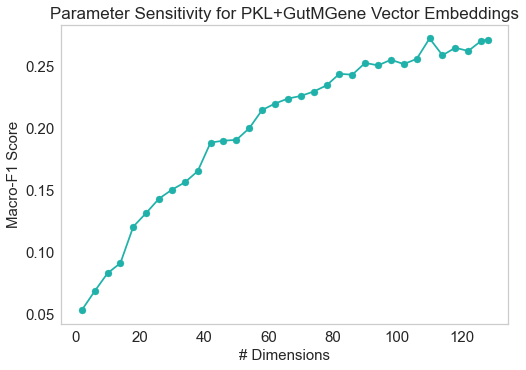

In [235]:
from kneed import KneeLocator, DataGenerator
'''
a = [a_tuple[0] for a_tuple in sorted_f1_scores]
b = [a_tuple[1] for a_tuple in sorted_f1_scores]
print(a)
print(b)
del a[11:13]
del b[11:13]
print(a)
print(b)

plt.scatter(a,b)
plt.title("Parameter Sensitivity for PKL+GutMGene Vector Embeddings")
plt.xlabel("# Dimensions")
plt.ylabel("Macro-F1 Score")
'''


dictionary_items = f1_scores_averaged.items()
sorted_f1_scores = sorted(dictionary_items)

a = [a_tuple[0] for a_tuple in sorted_f1_scores]
b = [a_tuple[1] for a_tuple in sorted_f1_scores]


plt.rc('axes',titlesize= 17,labelsize=15)
plt.scatter(a,b,color='lightseagreen')
plt.plot(a,b,color='lightseagreen')
plt.title("Parameter Sensitivity for PKL+GutMGene Vector Embeddings")
plt.xlabel("# Dimensions")
plt.ylabel("Macro-F1 Score")
plt.grid(False)

plt.savefig(embeddings_files_dir + 'F1_Scores_all.png')


k = KneeLocator(a,b,curve='concave',direction='increasing')
print(round(k.knee, 3))
print(round(k.elbow, 3))

[[ -0.98607355   9.55319617   3.60263268 ...   4.72442079 -10.23895268
    8.91107166]
 [ -3.48301954  -3.28381631   6.25659168 ...  11.08367374   5.27024744
   -4.66551824]
 [  5.80121889  -6.40530668  -7.45313369 ...  -5.69083886  -3.64631494
   -1.64218255]
 ...
 [ -1.05579258  -6.22824408   7.15927423 ...   9.18857979   6.77532773
   -6.14627356]
 [ -4.345403     9.52227746   3.53651223 ...   4.0625619   -8.66923363
    9.1079225 ]
 [ -4.44248129  -7.75158626   2.18740289 ...   3.63464776  -4.760207
    0.65090861]]
[0 5 1 5 6 4 2 3 6 6 6 4 0 5 2 2 7 7 2 2 5 6 0 2 1 6 4 6 3 4 7 3 1 4 1 3 6
 7 5 5 5 4 6 2 2 5 4 4 3 4 4 7 2 5 5 0 0 6 7 1 4 7 0 1 5 4 3 1 6 0 7 2 4 4
 6 3 3 7 1 0 6 7 6 1 4 1 3 5 7 1 5 3 2 4 7 0 1 4 0 7 0 0 0 3 1 2 1 1 1 0 1
 1 1 2 5 4 1 7 2 6 6 5 5 5 7 4 2 5 0 4 4 5 7 7 4 5 7 3 2 7 3 4 1 6 1 4 7 7
 4 5 2 7 1 6 3 2 4 4 7 1 7 2 1 2 3 1 1 5 5 0 2 0 4 2 3 3 7 2 3 5 7 0 2 2 7
 5 4 4 2 5 1 6 7 6 0 7 0 3 4 6 3 4 0 2 6 2 2 1 3 2 2 7 5 0 1 3 0 6 0 3 5 0
 0 5 7 7 5 4 5 5 3 6 4 2

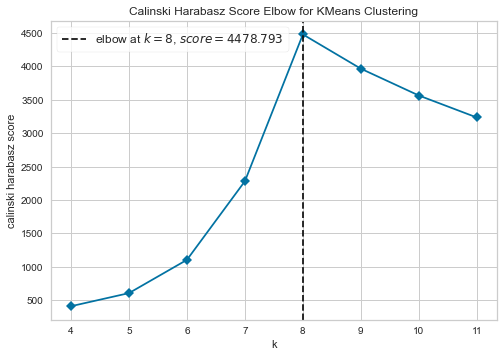

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [66]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)
print(X)
print(y)
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [3]:
import copy
f1_scores_orig = copy.deepcopy(f1_scores)
plot_f1_scores(embeddings_files_dir,f1_scores_orig)

NameError: name 'f1_scores' is not defined

In [203]:
f1_scores[66] = f1_scores.pop('66') 
f1_scores[62] = f1_scores.pop('62') 
f1_scores[58] = f1_scores.pop('58') 
f1_scores[2] = f1_scores.pop('2') 

In [204]:
print(f1_scores)

{126: 0.2716488165248561, 2: 0.054629031470406195, 66: 0.21938738798160812, 30: 0.15330387258035577, 50: 0.19758000597441103, 90: 0.24429896838448031, 82: 0.24445237186966734, 70: 0.23624323627025892, 102: 0.26553615370050276, 62: 0.23854513515225956, 58: 0.2251327145771468}


In [199]:
print(f1_scores)

{126: 0.2716488165248561, 2: 0.054629031470406195, 66: 0.21938738798160812, 30: 0.15330387258035577, 50: 0.19758000597441103, 90: 0.24429896838448031, 82: 0.24445237186966734, 70: 0.23624323627025892, 102: 0.26553615370050276, '2': 0.054629031470406195}


[(2, 0.054629031470406195), (30, 0.15330387258035577), (50, 0.19758000597441103), (66, 0.21938738798160812), (70, 0.23624323627025892), (82, 0.24445237186966734), (90, 0.24429896838448031), (102, 0.26553615370050276), (126, 0.2716488165248561)]


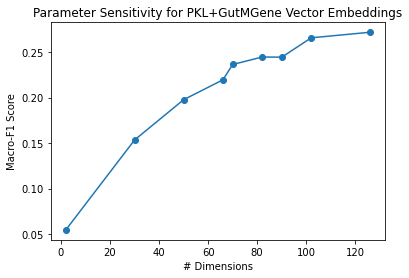

In [193]:
import matplotlib.pyplot as plt
import re


#Sort dimensions from lowest to highest for plot
dictionary_items = f1_scores.items()
sorted_f1_scores = sorted(dictionary_items)

x = [a_tuple[0] for a_tuple in sorted_f1_scores]
y = [a_tuple[1] for a_tuple in sorted_f1_scores]
plt.title("Parameter Sensitivity for PKL+GutMGene Vector Embeddings")
plt.xlabel("# Dimensions")
plt.ylabel("Macro-F1 Score")
plt.scatter(x,y)
plt.plot(x,y)

    

In [184]:
a = 'PheKnowLator_v2_node2vec_Embeddings126.emb'
new = re.search("Embeddings(.*?).emb", a).group(1)
print(new) 

126


In [197]:

print(f1_scores)

{126: 0.2716488165248561, 2: 0.054629031470406195, 66: 0.21938738798160812, 30: 0.15330387258035577, 50: 0.19758000597441103, 90: 0.24429896838448031, 82: 0.24445237186966734, 70: 0.23624323627025892, 102: 0.26553615370050276}


In [187]:
f1_scores = {'PheKnowLator_v2_node2vec_Embeddings126.emb': 0.2716488165248561, 'PheKnowLator_v2_node2vec_Embeddings2.emb': 0.054629031470406195, 'PheKnowLator_v2_node2vec_Embeddings66.emb': 0.21938738798160812, 'PheKnowLator_v2_node2vec_Embeddings30.emb': 0.15330387258035577, 'PheKnowLator_v2_node2vec_Embeddings50.emb': 0.19758000597441103, 'PheKnowLator_v2_node2vec_Embeddings90.emb': 0.24429896838448031, 'PheKnowLator_v2_node2vec_Embeddings82.emb': 0.24445237186966734, 'PheKnowLator_v2_node2vec_Embeddings70.emb': 0.23624323627025892, 'PheKnowLator_v2_node2vec_Embeddings102.emb': 0.26553615370050276}

In [146]:
extra_names = ['snomedct', 'EVS/', 'fma#']

for i in list(iden.keys()):
    for j in extra_names:
        if j in i:
            print(i)

<http://ihtsdo.org/snomedct/anatomy#421466002>
<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#Amniotic_Fluid>
<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#Gonad>
<http://sig.uw.edu/fma#Common_iliac_artery>
<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#Iliac_Vein>
<http://sig.uw.edu/fma#External_genitalia>
<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#Amniotic_Sac>
<http://sig.uw.edu/fma#Amnion>
<http://sig.uw.edu/fma#Umbilicus>
<http://sig.uw.edu/fma#Trachealis>
<http://sig.uw.edu/fma#Scalp>
<http://sig.uw.edu/fma#Iliac_crest>
<http://sig.uw.edu/fma#Ischium>
<http://sig.uw.edu/fma#Calcaneal_tendon>
<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#Chorionic_Villus>
<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#Embryonic_Fluid>
<http://sig.uw.edu/fma#Tunica_albuginea_of_testis>
<http://sig.uw.edu/fma#Right_ischium>


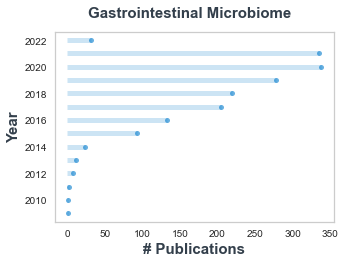

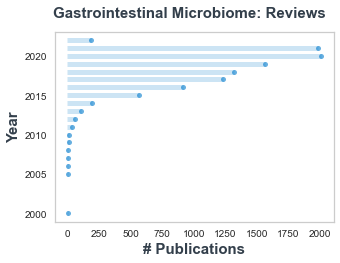

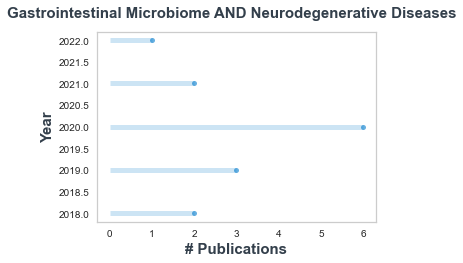

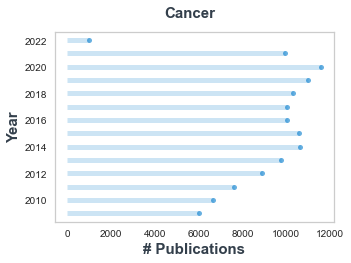

In [211]:
import matplotlib.pyplot as plt
#looking at Pubmed search from 3/3/2020
pubmed_gm_file = '/Users/brooksantangelo/Documents/HunterLab/Exploration/GastrointestinalMicrobiomePubMed_Timeline_Results_by_Year.csv'
pubmed_gmR_file = '/Users/brooksantangelo/Documents/HunterLab/Exploration/GastrointestinalMicrobiomeReviewsPubMed_Timeline_Results_by_Year.csv'
pubmed_gmnd_file = '/Users/brooksantangelo/Documents/HunterLab/Exploration/GastrointestinalMicrobiomeANDNeurodegenerativeDiseasePubMed_Timeline_Results_by_Year.csv'
pubmed_c_file = '/Users/brooksantangelo/Documents/HunterLab/Exploration/CancerPubMed_Timeline_Results_by_Year.csv'



pubmed_gm_results = pd.read_csv(pubmed_gm_file,skiprows=1)
pubmed_gmR_results = pd.read_csv(pubmed_gmR_file,skiprows=1)
pubmed_gmnd_results = pd.read_csv(pubmed_gmnd_file,skiprows=1)
pubmed_c_results = pd.read_csv(pubmed_c_file,skiprows=1)

def plot_pubmed_results(pubmed_results,search_term):
    
    year=pubmed_results.Year
    ct=pubmed_results.Count


    plt.rcParams['font.family'] = 'sans-serif'

    fig, ax = plt.subplots(figsize=(5,3.5))
    ax.grid(False)
    plt.hlines(y=year, xmin=0, xmax=ct, color='#007acc', alpha=0.2, linewidth=5)

    plt.plot(ct, year, "o", markersize=5, color='#007acc', alpha=0.6)


    ax.set_xlabel('# Publications', fontsize=15, fontweight='black', color = '#333F4B')
    ax.set_ylabel('Year',fontsize=15, fontweight='black', color = '#333F4B')
    fig.suptitle(search_term,fontsize=15, fontweight='black', color = '#333F4B')
    
plot_pubmed_results(pubmed_gm_results,'Gastrointestinal Microbiome')   
plot_pubmed_results(pubmed_gmR_results,'Gastrointestinal Microbiome: Reviews')   
plot_pubmed_results(pubmed_gmnd_results,'Gastrointestinal Microbiome AND Neurodegenerative Diseases')
plot_pubmed_results(pubmed_c_results,'Cancer')


